<a href="https://colab.research.google.com/github/sushmukund26/ANOVA_Python/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

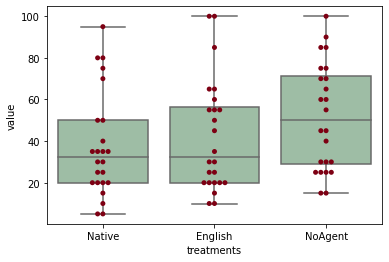

In [5]:
import pandas as pd
# load data file
df = pd.read_csv("nasatlx_frustration.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Native', 'English', 'NoAgent'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [6]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(df['Native'], df['English'], df['NoAgent'])
print(fvalue, pvalue)

1.7958004195117598 0.17366557240819444


In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),2429.861111,2.0,1.7958,0.173666
Residual,46681.250000,69.0,NaN,NaN


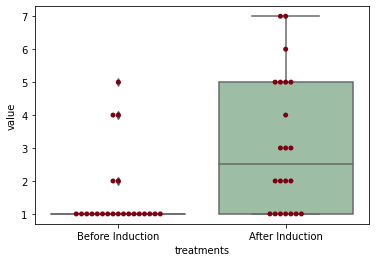

In [8]:
# load data file
df = pd.read_csv("EmotionInductionBeforeAfter.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Before Induction', 'After Induction'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [9]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(df['Before Induction'], df['After Induction'])
print(fvalue, pvalue)

9.25152439024391 0.00404413206120352


In [10]:
stats.kruskal(df['Before Induction'], df['After Induction'])

KruskalResult(statistic=9.28334717033349, pvalue=0.0023124648308566398)

In [11]:
stats.wilcoxon(df['Before Induction'], df['After Induction'])

WilcoxonResult(statistic=0.0, pvalue=0.0005897301226638464)